# Task 3: Exploratory Data Analysis on DataSet "Sample Superstore"

## Objective
 1. Perform "Exploratory Data Analysis" on the Dataset "Sample Superstore"
 2. As a bussiness manager, try to find out the weak areas where you can work to make more profit.
 3. what all bussiness problems you can drive by exploring the data?

#  Data Science & Business Analytics internship

## Graduate Rotational Internship Program (GRIP) at the Sparks Foundation

## BY: AWAIS ALEEM

# Step 1: Import the Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Step 2: Data Preprocessing

In [2]:
dataSet = pd.read_csv("C:/Users/KHAAN/OneDrive/Desktop/Ml_DAtaSets/SampleSuperstore(Explatory Data Analysis).csv")

In [3]:
dataSet.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [4]:
dataSet.tail()

Ship Mode   Segment        Country         City       State  \
9989    Second Class  Consumer  United States        Miami     Florida   
9990  Standard Class  Consumer  United States   Costa Mesa  California   
9991  Standard Class  Consumer  United States   Costa Mesa  California   
9992  Standard Class  Consumer  United States   Costa Mesa  California   
9993    Second Class  Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
9989       0.2   4.1028  
9990       0.0  15.6332  
9991       0.2  19.3932  
9992       0.0  13.3200  
9993       0.0  72.9480

In [5]:
dataSet.shape

(9994, 13)

# Data Cleaning

In [6]:
dataSet.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

there is No null values in our dataset 

In [7]:
#statical overview of the data
dataSet.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [8]:
#information about dataset
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
#Columns inside the dataset
dataSet.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
dataSet.duplicated().sum()

17

In [11]:
dataSet['Postal Code'] = dataSet['Postal Code'].astype('object')

In [12]:
dataSet.drop_duplicates(subset= None , keep = 'first' , inplace = True)
dataSet.duplicated().sum()

0

# Step 3: Exploratory Data Analysis(EDA)

In [13]:
numerical_features = dataSet.select_dtypes(include = [np.number])
numerical_features.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [14]:
categorical_features = dataSet.select_dtypes(include = [np.object])
categorical_features.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between variables')

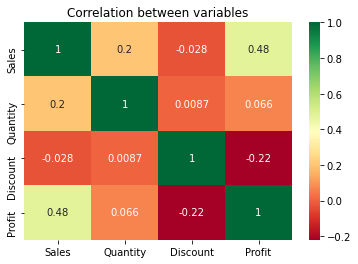

In [18]:
cor_relation = dataSet.corr()
sns.heatmap(cor_relation , annot=True, cmap= 'RdYlGn')
plt.title('Correlation between variables')

The Graph shows:
    1. Sale and Profit have positive correlation.
    2. Discount and Profit have highly negative correlation.

In [19]:
#droping postal code column
dataSet = dataSet.drop(['Postal Code'] , axis=1)

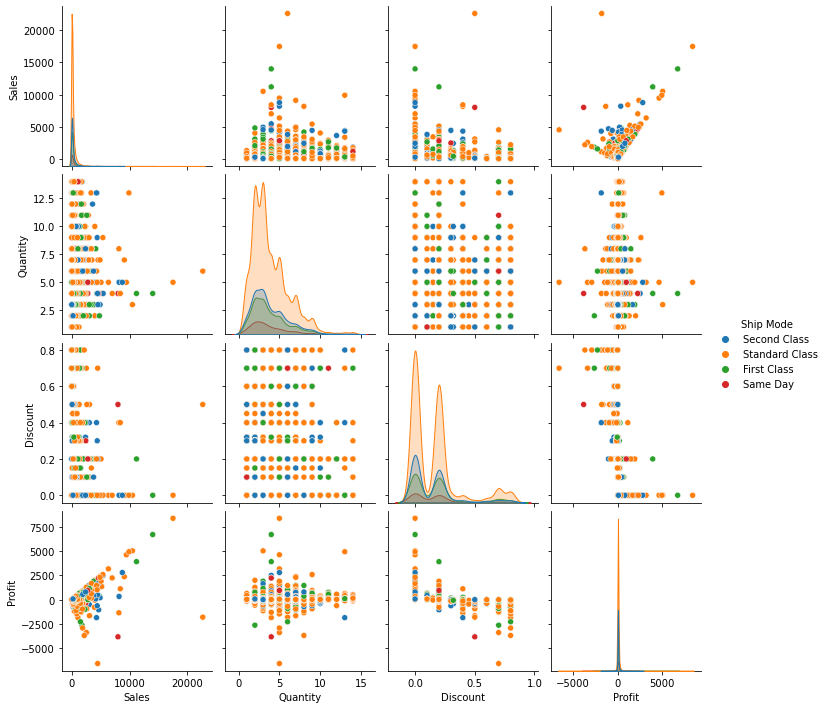

In [20]:
sns.pairplot(data= dataSet , hue = 'Ship Mode')

In [22]:
dataSet['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

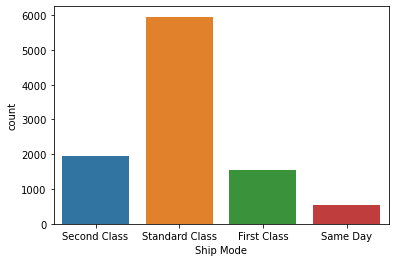

In [23]:
sns.countplot(x = dataSet['Ship Mode'])

In [24]:
dataSet['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

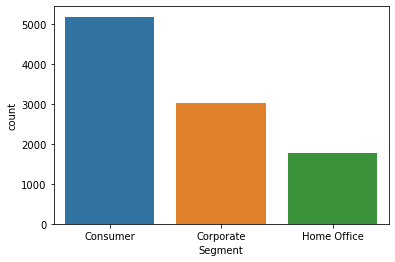

In [25]:
sns.countplot(x = dataSet['Segment'])

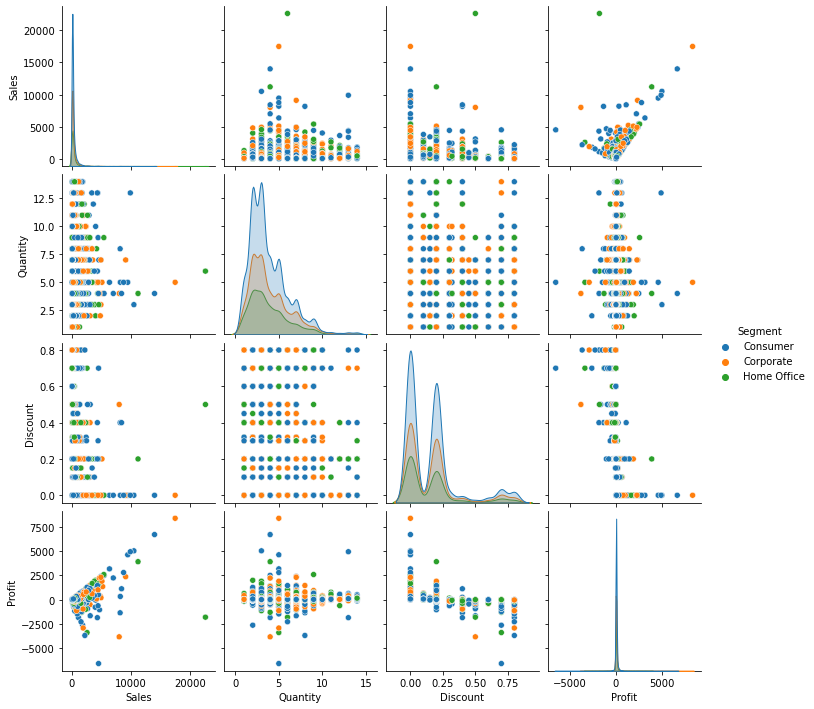

In [26]:
sns.pairplot(data= dataSet , hue = 'Segment')

In [28]:
dataSet['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

Text(0.5, 1.0, 'Categories of Products')

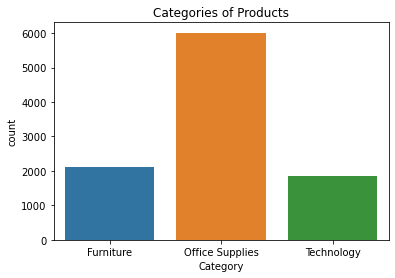

In [31]:
sns.countplot(x=dataSet['Category'])
plt.title('Categories of Products')

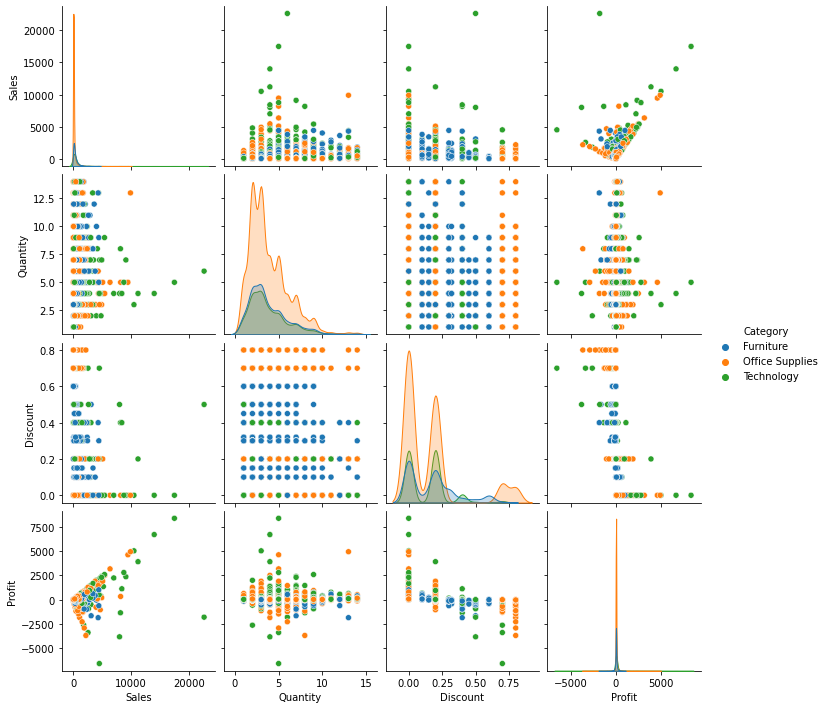

In [32]:
sns.pairplot(data= dataSet , hue = 'Category')

In [35]:
dataSet['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

Text(0.5, 1.0, 'Quantity of different Sub-Categories Ordered')

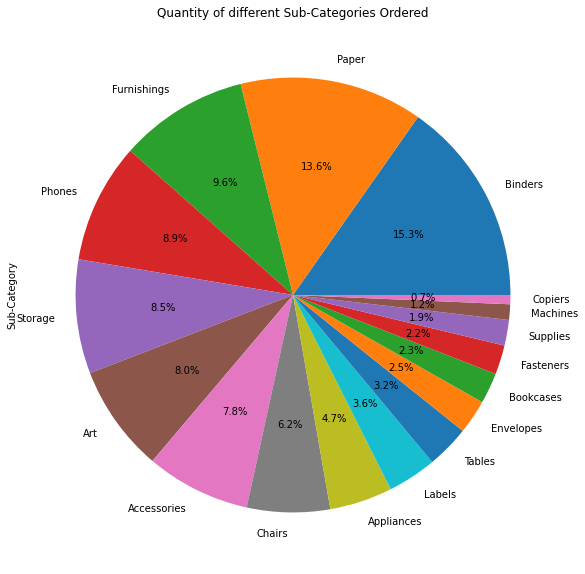

In [39]:
plt.figure(figsize=(10,10))
dataSet['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Quantity of different Sub-Categories Ordered')

### Insight 1: 
Maximiums are from Binders, papers, Furnishing, phones, Storage, Art, Accessories, Chairs, and minimum from copiers, Machines , supplies , bookcases

In [40]:
dataSet['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

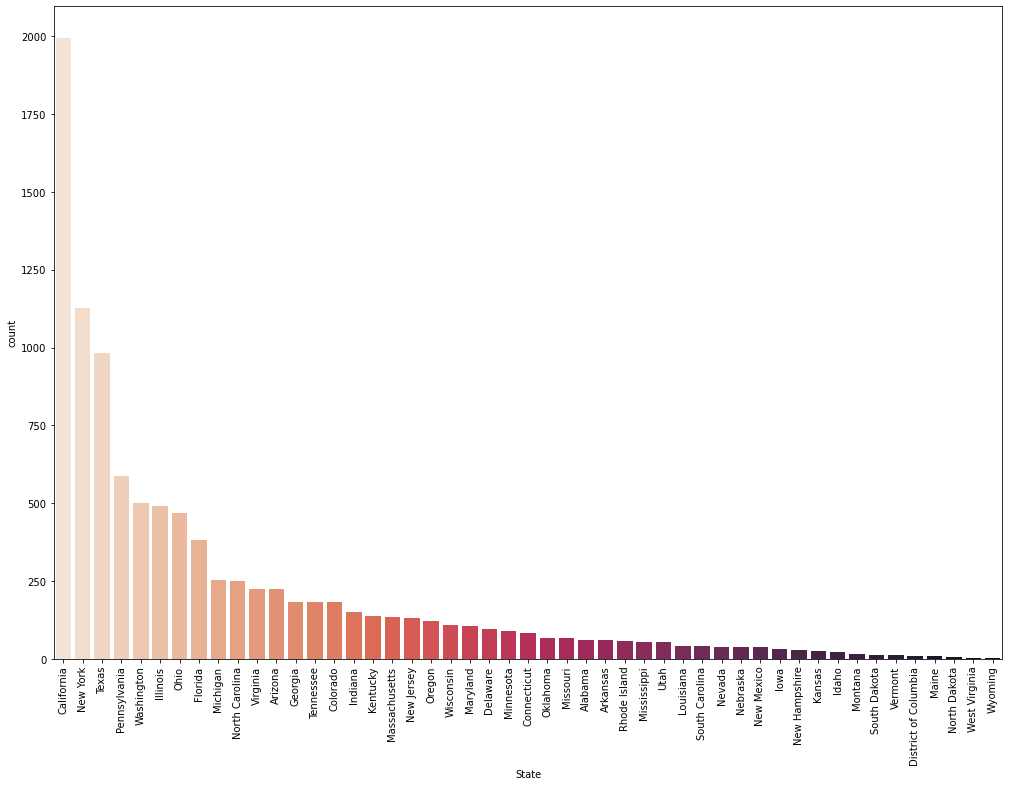

In [44]:
plt.figure(figsize=(17,12))
sns.countplot(x = 'State' , data=dataSet , palette='rocket_r' , order= dataSet['State'].value_counts().index)
plt.xticks(rotation = 90)

## Insight 2:
Highest Number of buyers are from California , New York and Texas.

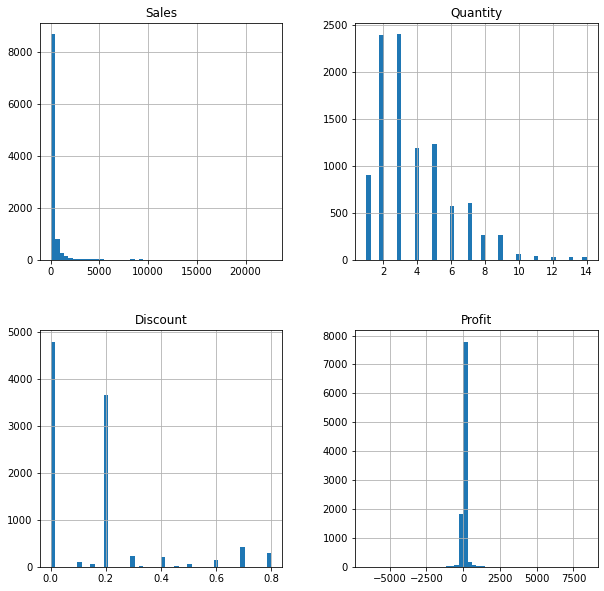

In [45]:
dataSet.hist(figsize=(10,10) , bins=50)
plt.show()

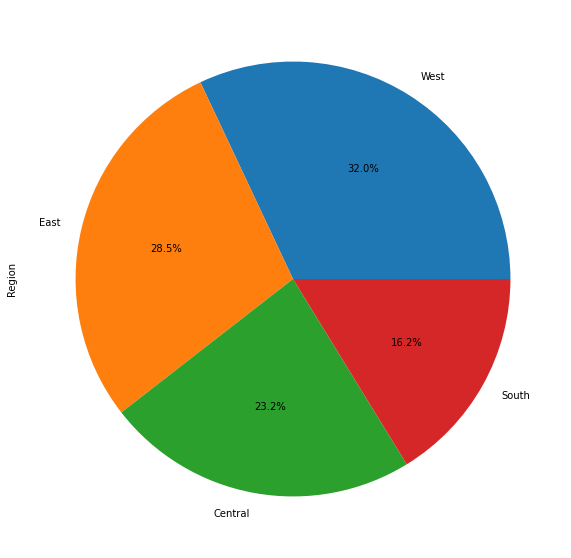

In [46]:
plt.figure(figsize=(10,10))
dataSet['Region'].value_counts().plot.pie(autopct="%1.1f%%")

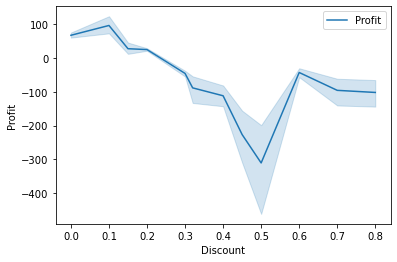

In [47]:
sns.lineplot(x = 'Discount' , y = 'Profit' , data=dataSet , label = 'Profit')

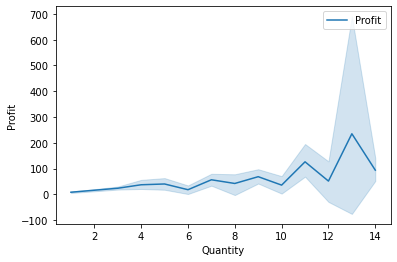

In [48]:
sns.lineplot(x = 'Quantity' , y = 'Profit' , data=dataSet , label = 'Profit')

                      Profit        Sales
Category                                 
Furniture         18421.8137  741306.3133
Office Supplies  122364.6608  718735.2440
Technology       145454.9481  836154.0330


<ipython-input-51-e7a87e11ac60>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  da_g = dataSet.groupby('Category')['Profit','Sales'].agg('sum')


Text(0, 0.5, 'Profit/loss and Sale')

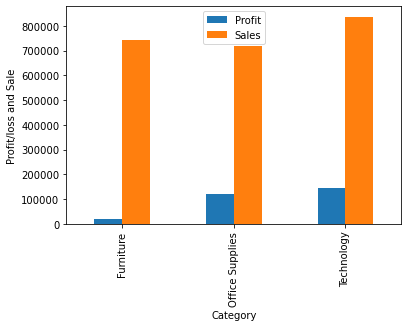

In [51]:
da_g = dataSet.groupby('Category')['Profit','Sales'].agg('sum')
print(da_g)
da_g.plot.bar()
plt.ylabel('Profit/loss and Sale')

## Insight 3:
profit and sales are maximum in Technology category and minimum in Furniture Category

Text(0.5, 0, 'Region')

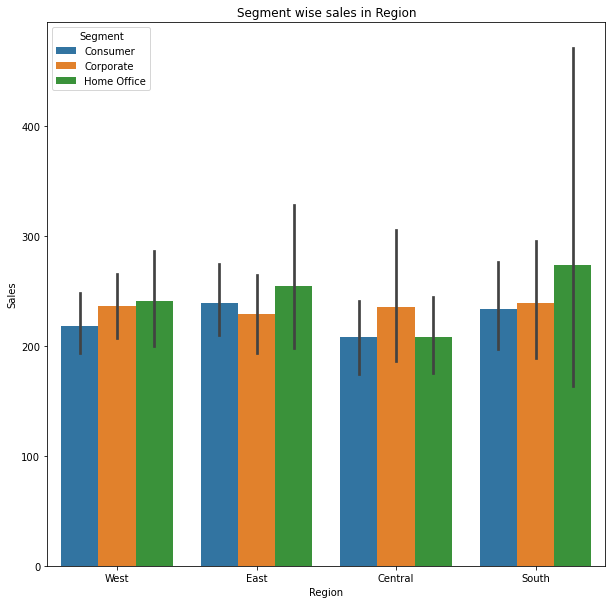

In [55]:
plt.figure(figsize=(10,10))
plt.title('Segment wise sales in Region')
sns.barplot(x='Region' , y = 'Sales' , data=dataSet , hue = 'Segment', order= dataSet['Region'].value_counts().index)
plt.xlabel('Region')

## Insight 4:
    Segment wise sales in regions are almost same.

<ipython-input-56-9f66cfbaf709>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataSet.groupby('Region')['Profit','Sales'].sum().plot.bar(color = ['red' , 'blue'] , figsize = (10, 10))


Text(0, 0.5, 'Profit/loss and Sale')

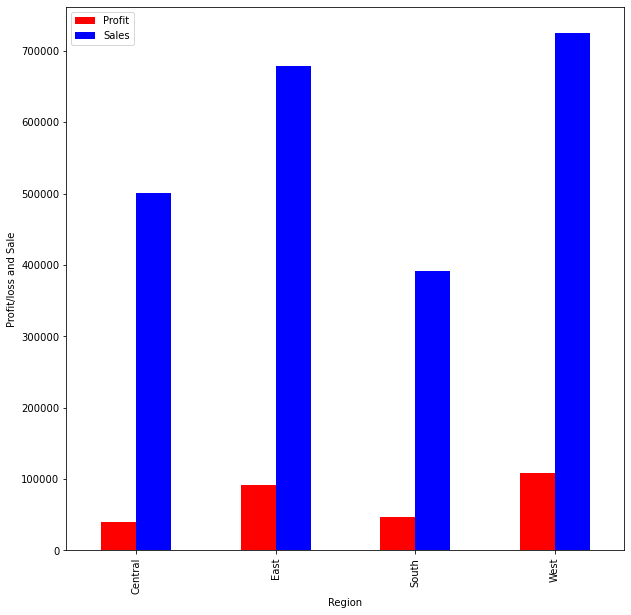

In [56]:
dataSet.groupby('Region')['Profit','Sales'].sum().plot.bar(color = ['red' , 'blue'] , figsize = (10, 10))
plt.ylabel('Profit/loss and Sale')

## Insight 5:
profit and sales are maximum in West Region while minimum in south Region

<ipython-input-59-1dd6f2a98904>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataSet.groupby('State')['Profit','Sales'].sum().sort_values(by = 'Sales' , ascending = False).plot.bar(color = ['red' , 'blue'] , figsize = (20, 20))


Text(0.5, 1.0, 'profit/loss across States')

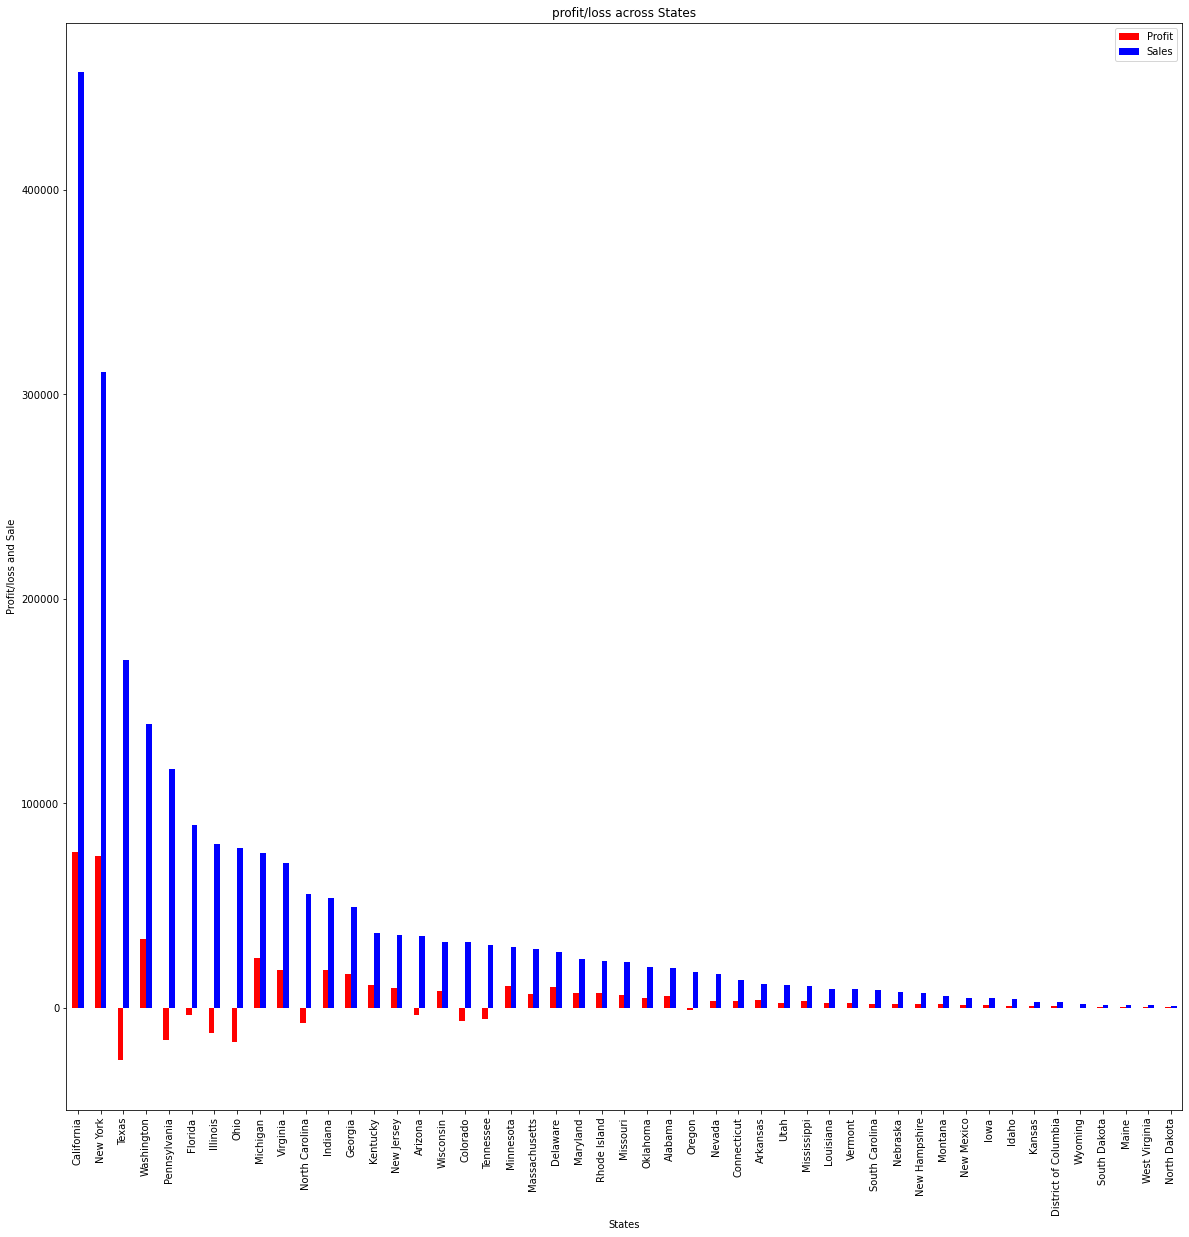

In [59]:
dataSet.groupby('State')['Profit','Sales'].sum().sort_values(by = 'Sales' , ascending = False).plot.bar(color = ['red' , 'blue'] , figsize = (20, 20))
plt.ylabel('Profit/loss and Sale')
plt.xlabel('States')
plt.title("profit/loss across States")

## Insight 6:
 1. High profit is from state of California and New York
 
 2. loss is from state of Texas, Pennsylvania ​and Ohio.

<ipython-input-62-ec00de333ad5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataSet.groupby('Category')['Profit','Sales'].sum().sort_values(by = 'Sales' , ascending = False).plot.bar(color = ['pink' , 'lightblue'] , figsize = (10, 10))


Text(0, 0.5, 'Profit/loss and Sale')

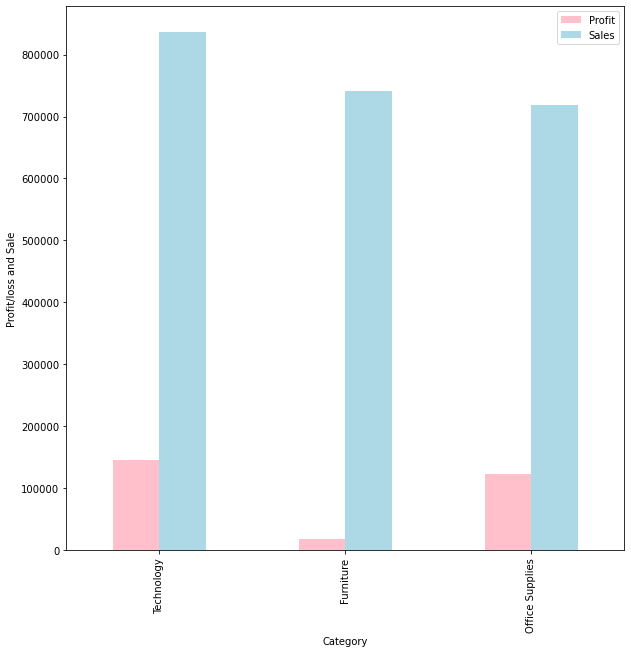

In [62]:
dataSet.groupby('Category')['Profit','Sales'].sum().sort_values(by = 'Sales' , ascending = False).plot.bar(color = ['pink' , 'lightblue'] , figsize = (10, 10))
plt.ylabel('Profit/loss and Sale')

## Insight 7: 

1. Technology and office supplies have high profit.

2. Furniture have less profit.

<ipython-input-65-b312422462c4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataSet.groupby('Sub-Category')['Profit','Sales'].sum().sort_values(by = 'Sales' , ascending = False).plot.bar(color = ['green' , 'brown'] , figsize = (20, 20))


Text(0.5, 1.0, 'profit/loss According to Sub_category')

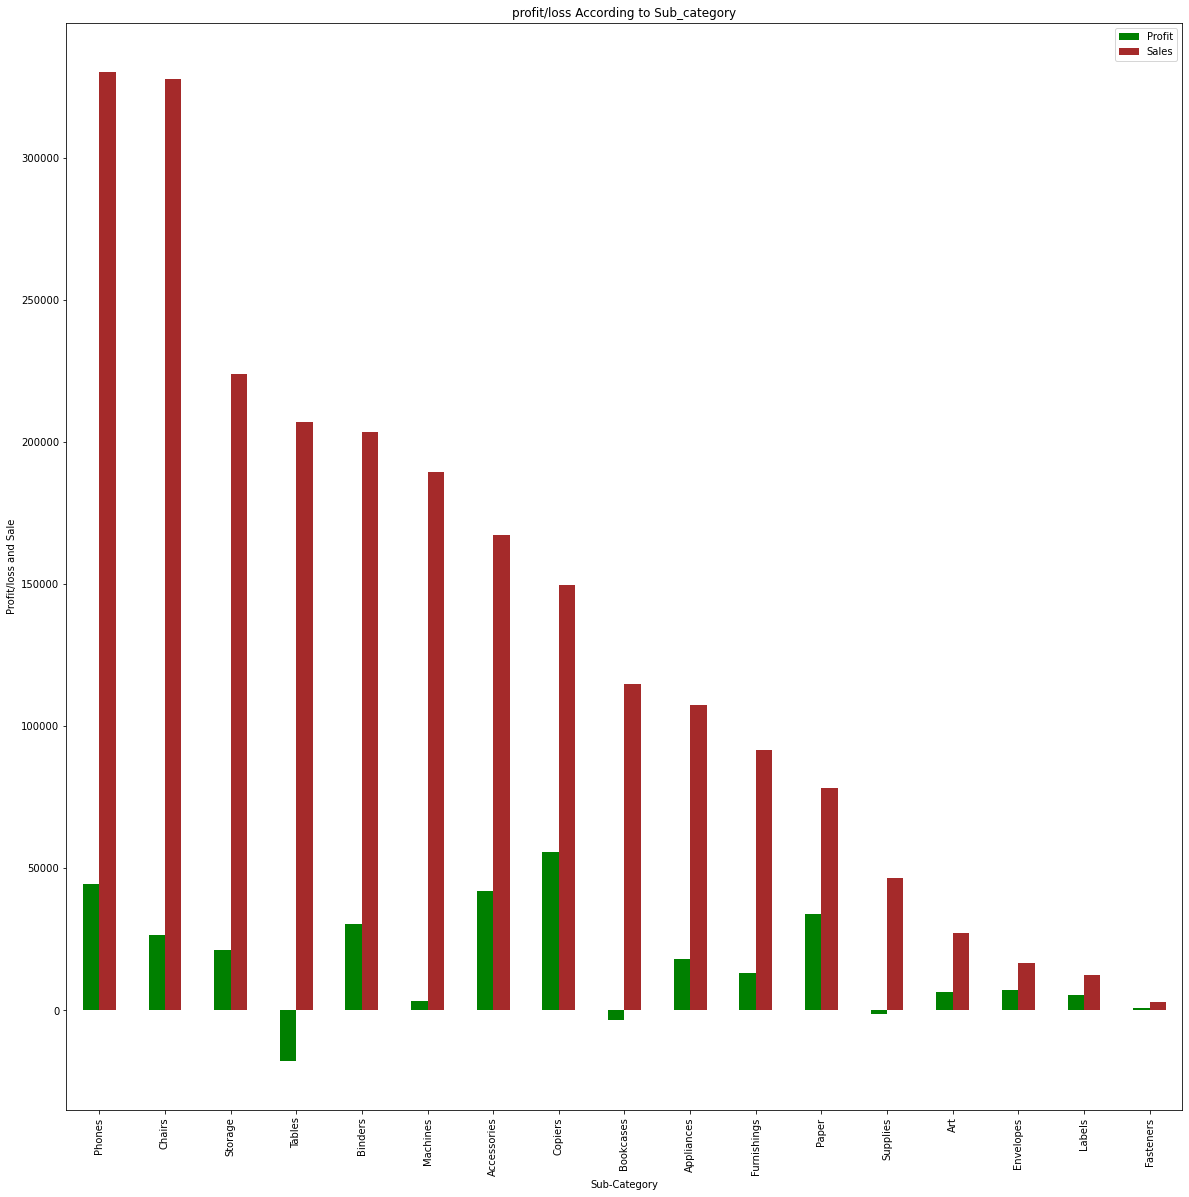

In [65]:
dataSet.groupby('Sub-Category')['Profit','Sales'].sum().sort_values(by = 'Sales' , ascending = False).plot.bar(color = ['green' , 'brown'] , figsize = (20, 20))
plt.ylabel('Profit/loss and Sale')
plt.xlabel('Sub-Category')
plt.title("profit/loss According to Sub_category")

## Insight 8:
1. Phone have high Sales.

2. Copiers have less sales but high profit.

3. Chairs have high sales but low profit.

4. Tables and Bookcases faces huge loss.

#                  Thank You